<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

This notebook focuses on computing statistics on the dynamics of the model. It will not use the extracted dynamics but the trajectories to determine how different the initial --> final state trajectories are.

In [1]:
from utils import train_model_iteratively, get_model_weights, convert_weight_dict_to_dataframe
# plotting
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
df = convert_weight_dict_to_dataframe(get_model_weights('./data/example_mnist'))

In [4]:
df.head(4)

,model_id,epoch,val_loss,conv_kernel_0_0,conv_kernel_0_1,conv_kernel_0_2,conv_kernel_0_3,conv_kernel_0_4,conv_kernel_0_5,conv_kernel_0_6,...,dense_kernel_0_26,dense_kernel_0_27,dense_kernel_0_28,dense_kernel_0_29,dense_kernel_0_30,dense_kernel_0_31,dense_kernel_0_32,dense_kernel_0_33,dense_kernel_0_34,dense_kernel_0_35
model.1-4-114.58.hdf5,model.1,4,114.58,0.645444,1.379788,-0.217629,0.655645,1.030957,-1.105817,-0.860753,...,-1.521248,-1.221815,1.910476,-1.591048,0.174252,0.418886,2.074132,0.940226,-1.413859,1.404976
model.2-12-16.86.hdf5,model.2,12,16.86,-0.724952,-0.540934,1.262243,-0.875147,0.944796,0.551129,-0.693677,...,-1.445305,-2.449076,-0.127730,-1.078782,-1.207933,-0.248174,-0.894893,-0.624966,-0.785809,-1.692444
model.5-2-358.98.hdf5,model.5,2,358.98,-0.559430,-0.888182,-1.541573,0.160346,-0.581759,0.891427,-0.360268,...,0.425970,1.095307,0.931358,-0.312380,0.552291,0.820213,1.152580,-0.186319,-0.600931,0.996074
model.3-8-113.08.hdf5,model.3,8,113.08,0.937205,0.336779,-0.996337,-0.432330,-1.419278,-1.812614,-0.281635,...,-0.276534,1.362751,0.724427,0.919965,0.772994,-1.530842,-1.048829,-0.000871,-0.003852,0.307832


In [5]:
df['epoch']=df['epoch'].astype(int)
df['val_loss']=df['val_loss'].astype(float)

In [38]:
df['epoch'].max()

12

In [6]:
from mg import gp, gp_tensorflow, compute_mse

In [7]:
#Compute Gaussian
cols = [x for x in df.columns if 'kernel' in x]
X1 = df[df['epoch'] == df['epoch'].min()][cols]
Y1 = df[df['epoch'] == df['epoch'].max()][cols]
gp_instance = gp(X1, Y1)

In [8]:
compute_mse(gp_instance.get_model().predict(X1.to_numpy()),Y1.to_numpy())

0.009417309043139852

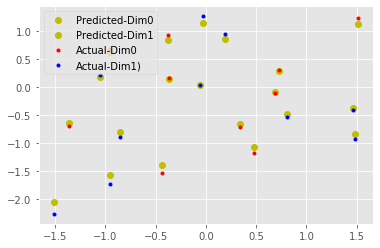

In [9]:

plt.plot(X1.to_numpy()[:,0],gp_instance.get_model().predict(X1.to_numpy())[:,0], 'yo', label='Predicted-Dim0')
plt.plot(X1.to_numpy()[:,1],gp_instance.get_model().predict(X1.to_numpy())[:,1], 'yo', label='Predicted-Dim1');

plt.plot(X1.to_numpy()[:,0], Y1.to_numpy()[:,0], 'r.', label='Actual-Dim0');
plt.plot(X1.to_numpy()[:,1], Y1.to_numpy()[:,1], 'b.', label='Actual-Dim1)');
plt.legend(loc="upper left");

In [10]:
gpt = gp_tensorflow(X1, Y1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [11]:
compute_mse(gpt.get_model().predict_f(X1.to_numpy())[0].numpy(),Y1.to_numpy())

0.275466636931196

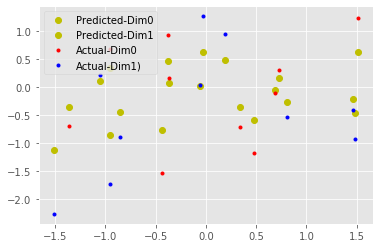

In [12]:
plt.plot(X1.to_numpy()[:,0],gpt.get_model().predict_f(X1.to_numpy())[0].numpy()[:,0], 'yo', label='Predicted-Dim0')
plt.plot(X1.to_numpy()[:,1],gpt.get_model().predict_f(X1.to_numpy())[0].numpy()[:,1], 'yo', label='Predicted-Dim1');

plt.plot(X1.to_numpy()[:,0], Y1.to_numpy()[:,0], 'r.', label='Actual-Dim0');
plt.plot(X1.to_numpy()[:,1], Y1.to_numpy()[:,1], 'b.', label='Actual-Dim1)');
plt.legend(loc="upper left");

In [13]:
from sklearn.decomposition import PCA

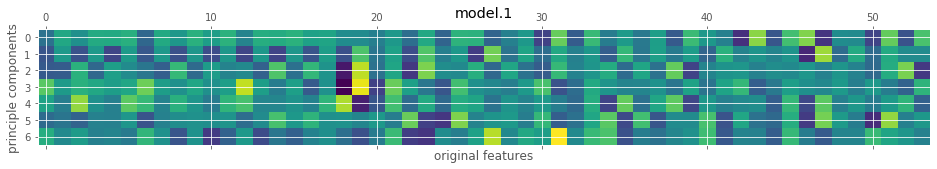

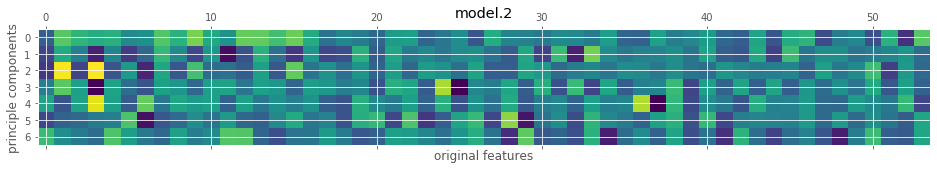

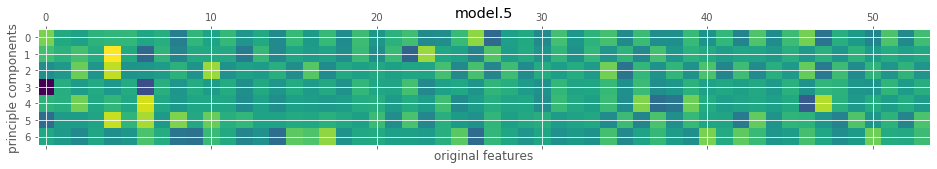

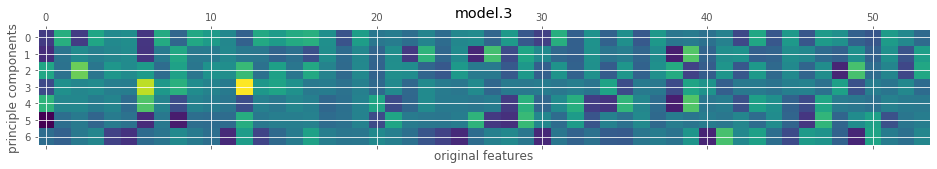

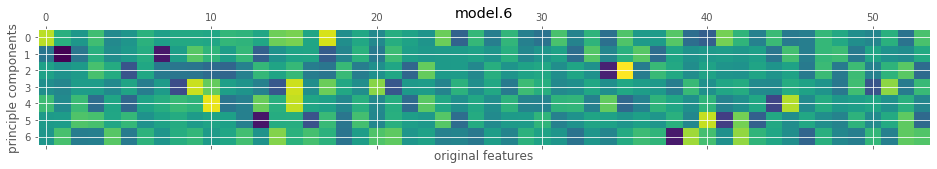

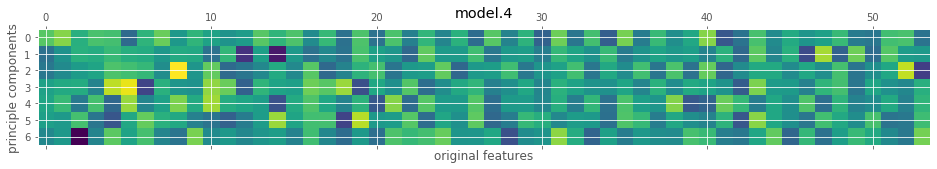

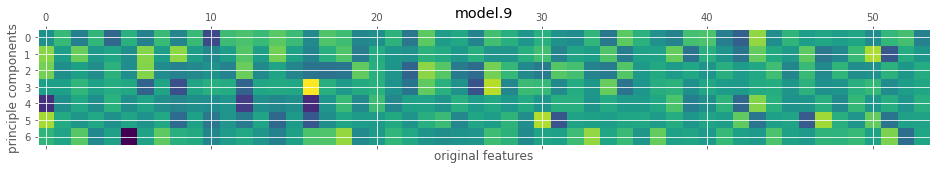

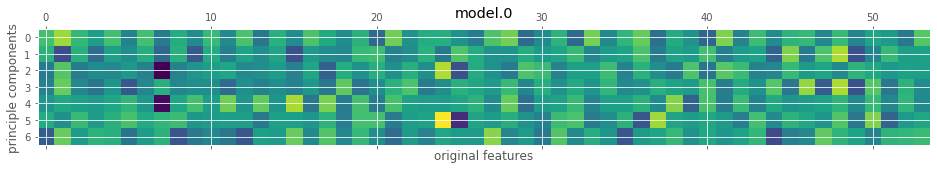

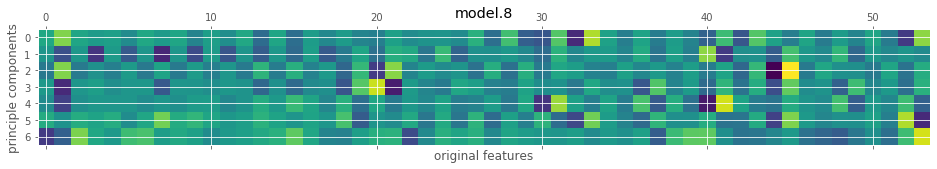

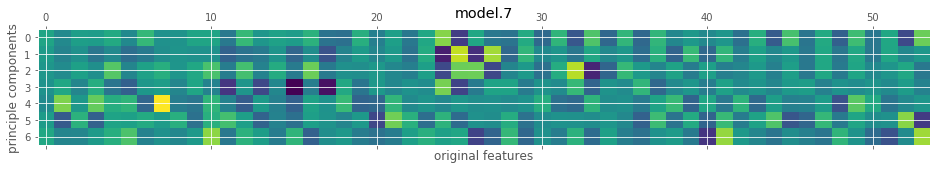

In [42]:
import numpy as np
df_list = []
pc_list = []
for model in df['model_id'].unique():
    df_model = df[df['model_id']==model]
    pca = PCA()
    pca.fit_transform(df_model[cols])
    sum_of_rows = np.abs(pca.components_).sum(axis=1)
#     normalized_array = pca.components_ / sum_of_rows[:, np.newaxis]
    normalized_array = pca.components_ 
    plt.matshow(normalized_array,cmap='viridis')
    df_temp = pd.DataFrame(normalized_array)
    df_temp['model']=model
    df_list.append(df_temp)
    plt.ylabel('principle components')
    plt.xlabel('original features')
    plt.title(model)
    plt.show()#
    pc_list.append(pca.explained_variance_ratio_)
df_pc_ex_components = pd.DataFrame(pc_list)

In [41]:
df_pc_ex_components.loc[:,0].mean()

0.9596333229015759

In [15]:
pca.components_.shape

(7, 54)

In [16]:
df_tot = pd.concat(df_list)

In [17]:
df_tot.columns = ['weight_'+str(i) for i in df_tot.columns]
df_tot.reset_index(inplace=True)
df_tot

,index,weight_0,weight_1,weight_2,weight_3,weight_4,weight_5,weight_6,weight_7,weight_8,...,weight_45,weight_46,weight_47,weight_48,weight_49,weight_50,weight_51,weight_52,weight_53,weight_model
0,0,-0.084746,0.092760,0.015720,0.104968,0.099587,0.120345,-0.119383,0.100025,0.037835,...,0.172098,0.264491,-0.264490,0.003161,-0.003161,-0.224395,0.224394,-0.186575,0.186575,model.1
1,1,-0.175685,0.045171,-0.186942,0.042321,-0.219151,0.048615,-0.167312,0.042217,-0.189038,...,0.026802,-0.298696,0.298698,-0.102531,0.102531,-0.104265,0.104264,-0.001073,0.001073,model.1
2,2,-0.160731,-0.154493,0.126476,-0.117355,0.065949,-0.001311,-0.071624,-0.143798,0.151294,...,-0.005132,0.035113,-0.035110,0.031695,-0.031694,-0.110695,0.110693,0.254574,-0.254574,model.1
3,3,0.211648,0.049401,0.122454,0.093635,0.060816,0.086987,0.238529,0.058434,0.016198,...,0.062728,0.013395,-0.013411,0.043716,-0.043718,0.046518,-0.046474,-0.133751,0.133751,model.1
4,4,0.076579,-0.044898,0.286486,0.015838,-0.039293,0.212529,0.151076,-0.027346,0.123880,...,0.148697,-0.212459,0.212423,-0.036601,0.036577,-0.050269,0.050305,0.137823,-0.137823,model.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2,0.026794,-0.013491,0.067772,0.000212,0.227343,-0.040366,0.070797,0.122105,0.021248,...,0.060158,-0.091086,0.091091,-0.085763,0.085769,-0.021725,0.021733,0.092813,-0.092804,model.7
66,3,0.010609,0.092095,-0.036405,0.116791,-0.101642,-0.182546,0.029792,0.055661,-0.036816,...,0.038308,0.055434,-0.055414,0.009625,-0.009623,0.019174,-0.019185,0.050310,-0.050317,model.7
67,4,-0.016473,0.293610,0.033327,0.252204,0.116999,0.146529,-0.156794,0.474856,-0.068337,...,-0.060188,-0.050174,0.050171,-0.231774,0.231786,0.104134,-0.104097,-0.025670,0.025685,model.7
68,5,0.046874,-0.202549,0.135428,-0.178347,0.076910,0.068107,0.108739,0.047296,0.127574,...,-0.216023,-0.158436,0.158402,-0.085537,0.085520,-0.006837,0.006843,0.306731,-0.306737,model.7


In [18]:
df_tot.rename({'index':'pca_comp'},axis=1,inplace=True)

In [19]:
df_pc_0 = df_tot[df_tot['pca_comp']==0]

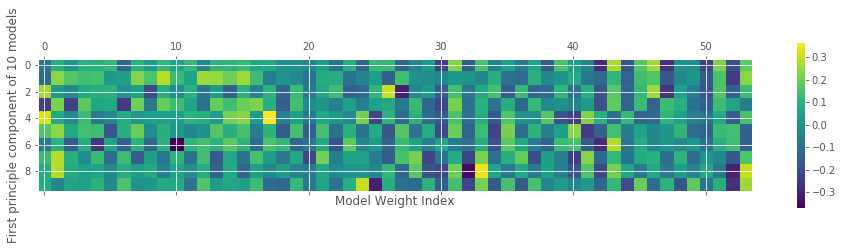

In [50]:
plt.matshow(df_pc_0,cmap='viridis')
plt.xlabel('Model Weight Index')
plt.ylabel('First principle component of 10 models')
plt.colorbar()

In [20]:
df_pc_0.set_index('weight_model',inplace=True)

In [21]:
df_pc_0.drop('pca_comp',inplace=True,axis=1)

/Users/meslami/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
def normalize(row):
    return row/np.sqrt(np.sum(row**2))
#     return np.sum(row**2)

# print(df_pc_0.apply(normalize,axis=1).shape)
df_pc_0 =df_pc_0.apply(normalize,axis=1)
(df_pc_0**2).sum(axis=1)

weight_model
model.1    1.0
model.2    1.0
model.5    1.0
model.3    1.0
model.6    1.0
model.4    1.0
model.9    1.0
model.0    1.0
model.8    1.0
model.7    1.0
dtype: float64

In [33]:
for i in df_pc_0.index:
    for j in df_pc_0.index:
        if np.dot(df_pc_0.loc[i,:],df_pc_0.loc[j,:])>1:
            print(i,j,np.dot(df_pc_0.loc[i,:],df_pc_0.loc[j,:]))

model.1 model.1 1.0000000000000004
model.2 model.2 1.0000000000000002
model.6 model.6 1.0000000000000002
model.9 model.9 1.0000000000000002
model.7 model.7 1.0000000000000002


In [23]:
from scipy.spatial.distance import cdist

In [24]:
Y = cdist(df_pc_0, df_pc_0, 'cosine')

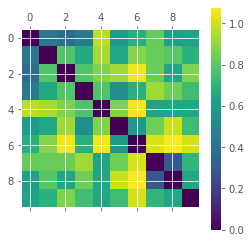

In [49]:
plt.matshow(Y,cmap='viridis')
plt.colorbar()

In [26]:
Y_df = pd.DataFrame(Y,columns=['model.'+str(i) for i in range(len(df_pc_0)) ])

Text(0, 0.5, 'Number of comparisons')

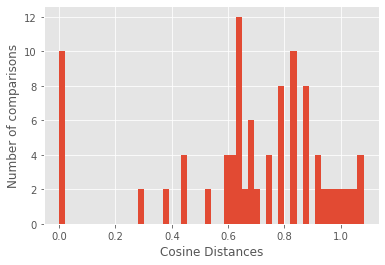

In [47]:
plt.hist(Y_df.unstack(),bins=50)
plt.xlabel('Cosine Distances')
plt.ylabel('Number of comparisons')

In [28]:
Y_df.max().max()

1.0808484731982695

In [29]:
Y_df

,model.0,model.1,model.2,model.3,model.4,model.5,model.6,model.7,model.8,model.9
0,0.000000,0.434351,0.380017,0.448005,0.967129,0.597890,0.679622,0.825610,0.608200,0.621780
1,0.434351,0.000000,0.788909,0.657768,0.938303,0.648423,0.880030,0.828613,0.799456,0.690744
2,0.380017,0.788909,0.000000,0.788194,0.871263,0.925700,1.055648,0.836686,0.634860,0.871213
3,0.448005,0.657768,0.788194,0.000000,0.781710,0.534185,0.684964,0.924897,0.842380,0.747923
4,0.967129,0.938303,0.871263,0.781710,0.000000,0.873656,1.060730,0.633243,0.634214,0.642710
5,0.597890,0.648423,0.925700,0.534185,0.873656,0.000000,0.585746,0.840606,0.989135,0.743251
6,0.679622,0.880030,1.055648,0.684964,1.060730,0.585746,0.000000,1.017369,1.080848,1.007483
7,0.825610,0.828613,0.836686,0.924897,0.633243,0.840606,1.017369,0.000000,0.297178,0.711016
8,0.608200,0.799456,0.634860,0.842380,0.634214,0.989135,1.080848,0.297178,0.000000,0.645424
9,0.621780,0.690744,0.871213,0.747923,0.642710,0.743251,1.007483,0.711016,0.645424,0.000000


In [34]:
df1 = pd.read_csv('/Users/meslami/Downloads/NovelChassis-Endogenous-Promoter__fc_etl_stats.csv')
df2 = pd.read_csv('/Users/meslami/Downloads/NovelChassis-Endogenous-Promoter__fc_meta (1).csv')

In [35]:
df3 = pd.merge(df1,df2,left_on='sample_id',right_on='sample_id')

In [36]:
df3['experiment_id'].value_counts()

experiment.transcriptic.r1fgm3zabaqbaw    1288
experiment.transcriptic.r1fgm3xyt8vds9    1288
experiment.transcriptic.r1f833ub7xn6vb    1288
experiment.transcriptic.r1f833szm3e3a6    1288
experiment.transcriptic.r1fgmamvmd7sc2    1232
experiment.transcriptic.r1fgmajbcfpf3q    1232
experiment.transcriptic.r1fem63zwnvhbg    1232
experiment.transcriptic.r1f7aux4qxty6b    1232
experiment.transcriptic.r1f7aturvjk65q    1008
experiment.transcriptic.r1fem4e25j5qqn     644
experiment.transcriptic.r1f7zwh6t4ekdm     448
experiment.transcriptic.r1f7zwjfh2af4v     448
Name: experiment_id, dtype: int64